In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import Imputer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [171]:
#loading the dataset
train_data = pd.read_csv('C:/Users/Sumanyu/Code/kaggle/titanic/train.csv')
test_data = pd.read_csv('C:/Users/Sumanyu/Code/kaggle/titanic/test.csv')

print(train_data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [137]:
survived = len(train_data[train_data['Survived']==1])
survived

#print(len(train_data[train_data['Survived']==1]))

#print(len(train_data))

train_data.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


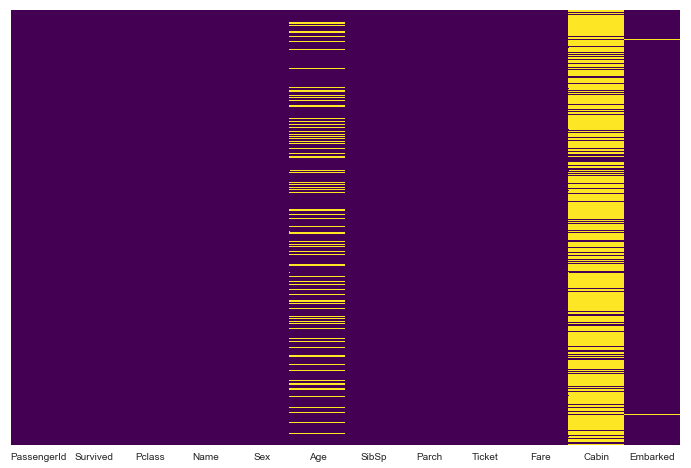

In [138]:
#Data Exploration

plt.figure(figsize=(12,8))
sns.heatmap(train_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')

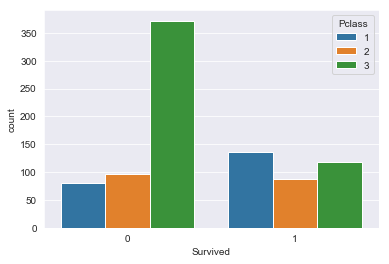

In [139]:
sns.set_style('darkgrid')
sns.countplot(data=train_data, hue='Pclass', x='Survived')

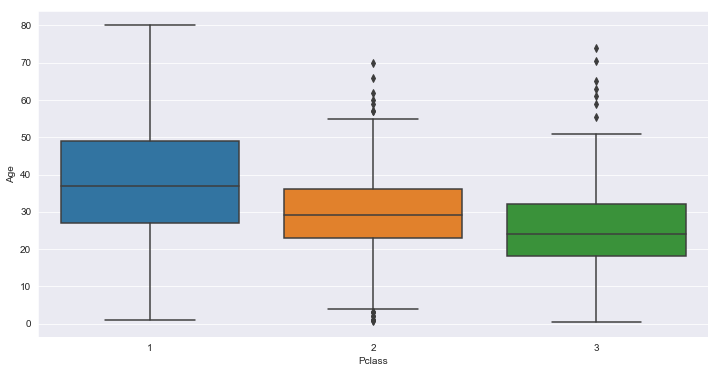

In [140]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_data, x='Pclass', y='Age')

In [166]:
train_data.groupby('Pclass').mean()

,Survived,Age,SibSp,Parch,Fare,Gender,Q,S
Pclass,,,,,,,,
1,0.626168,38.090748,0.420561,0.359813,84.193516,0.570093,0.009346,0.593458
2,0.472826,29.825163,0.402174,0.380435,20.662183,0.586957,0.016304,0.891304
3,0.242363,24.824684,0.615071,0.393075,13.675550,0.706721,0.146640,0.718941


In [167]:
train_data.groupby('Pclass').median()

,Survived,Age,SibSp,Parch,Fare,Gender,Q,S
Pclass,,,,,,,,
1,1,38.0,0,0,58.6896,1,0,1
2,0,29.0,0,0,14.2500,1,0,1
3,0,24.0,0,0,8.0500,1,0,1


In [141]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

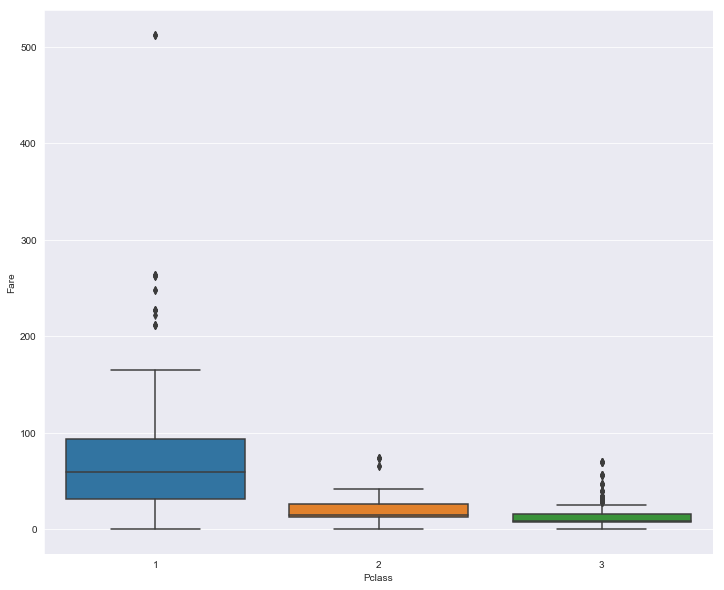

In [163]:
plt.figure(figsize=(12,10))
sns.boxplot(data=train_data, x='Pclass', y='Fare')

In [164]:
test_data.groupby('Pclass').mean()

,Age,SibSp,Parch,Fare,Male,Q,S
Pclass,,,,,,,
1,40.672897,0.476636,0.383178,94.280297,0.532710,0.009346,0.46729
2,28.789462,0.376344,0.344086,22.202104,0.677419,0.043011,0.83871
3,23.850599,0.465438,0.419355,12.459678,0.668203,0.188940,0.64977


In [165]:
test_data.groupby('Pclass').median()

,Age,SibSp,Parch,Fare,Male,Q,S
Pclass,,,,,,,
1,39.0,0,0,60.0000,1,0,0
2,28.0,0,0,15.7500,1,0,1
3,24.0,0,0,7.8958,1,0,1


In [179]:
def impute_fare(cols):
    fare = cols[0]
    pclass = cols[1]
    
    if pd.isnull(fare) :
        if pclass == 1:
            return 60
        elif pclass == 2:
            return 15.75
        else:
            return 7.90
    else:
        return fare

In [142]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

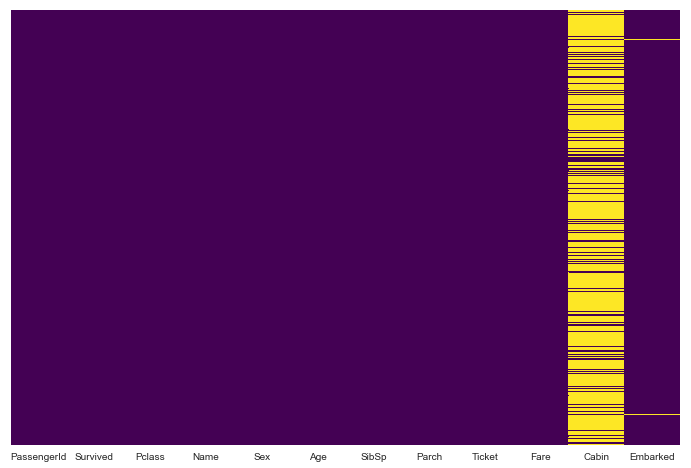

In [143]:
plt.figure(figsize=(12,8))
sns.heatmap(data=train_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [144]:
train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
train_data.dropna(inplace=True)

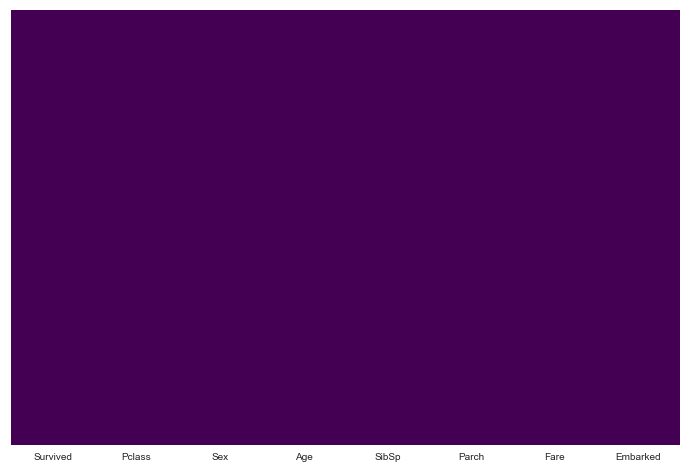

In [145]:
plt.figure(figsize=(12,8))
sns.heatmap(data=train_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [146]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [147]:
train_data['Gender'] = pd.get_dummies(train_data['Sex'], drop_first = True)
embarked = pd.get_dummies(train_data['Embarked'], drop_first = True)
train_data = pd.concat([train_data,embarked], axis=1)

In [148]:
train_data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [149]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [150]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Gender      889 non-null uint8
Q           889 non-null uint8
S           889 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [151]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [153]:
#selecting a model
model = linear_model.LogisticRegression()

#fitting a model
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
test_data = pd.read_csv('C:/Users/Sumanyu/Code/kaggle/titanic/test.csv')

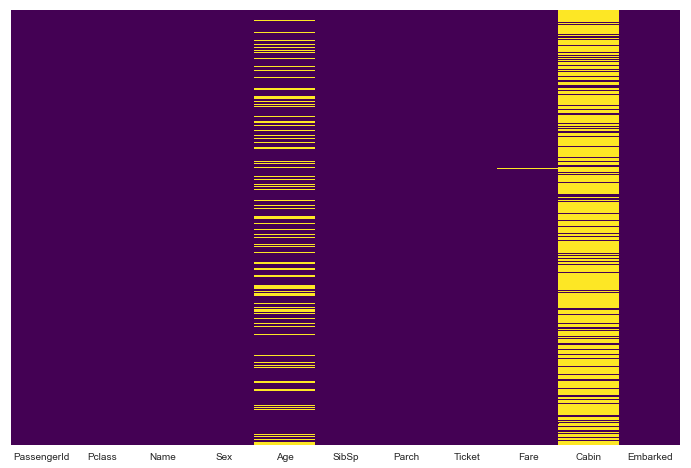

In [181]:
plt.figure(figsize=(12,8))
sns.heatmap(data=test_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [182]:
test_data['Age']=test_data[['Age','Pclass']].apply(impute_age, axis=1)
test_data.drop('Cabin', axis=1, inplace=True)
test_data['Fare'] = test_data[['Fare','Pclass']].apply(impute_fare, axis=1)
test_data['Male'] = pd.get_dummies(test_data['Sex'], drop_first=True)
embarked = pd.get_dummies(test_data['Embarked'], drop_first=True)
test_data = pd.concat([test_data, embarked], axis=1)
pass_ids = test_data['PassengerId']
test_data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

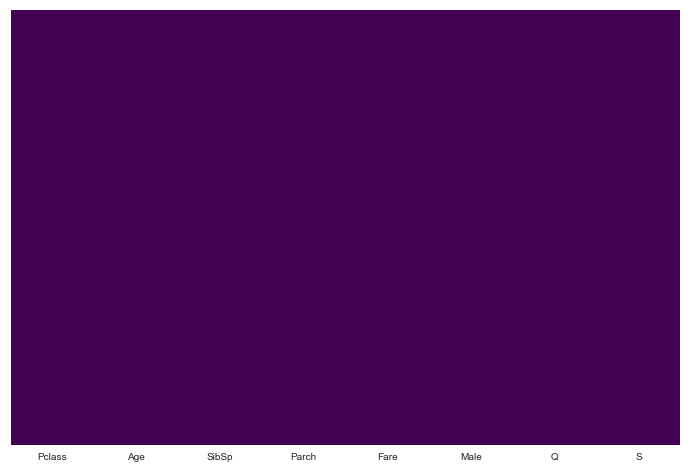

In [183]:
plt.figure(figsize=(12,8))
sns.heatmap(data=test_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)

In [184]:
test_data.tail()

,Pclass,Age,SibSp,Parch,Fare,Male,Q,S
413,3,24.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,24.0,0,0,8.0500,1,0,1
417,3,24.0,1,1,22.3583,1,0,0


In [185]:
predictions = model.predict(test_data)
len(predictions)

418

In [186]:
submission = pd.DataFrame({'PassengerId':pass_ids,'Survived':predictions})
print(submission.head())

filename = 'Titatic_Predictions.csv'
submission.to_csv(filename, index=False)
print('saved file '+filename)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
saved file Titatic_Predictions.csv
